# Iris-classification

In [222]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [223]:
# Chargement des donnees
df = pd.read_csv("data-iris.csv")
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [224]:
# Taille de donnees des 3 types de Iris
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [225]:
# Description du dataset
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


---

## Petal

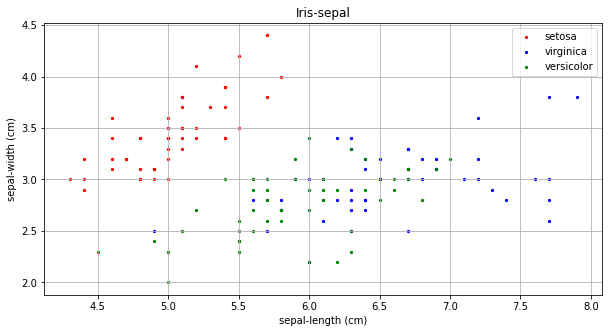

In [226]:
# sepal
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

ax.scatter(
    df[df['class']=='Iris-setosa']['sepallength'],
    df[df['class']=='Iris-setosa']['sepalwidth'],
    facecolor='r',s=5,label='setosa')
ax.scatter(
    df[df['class']=='Iris-virginica']['sepallength'],
    df[df['class']=='Iris-virginica']['sepalwidth'],
    facecolor='b',s=5,label='virginica')
ax.scatter(
    df[df['class']=='Iris-versicolor']['sepallength'],
    df[df['class']=='Iris-versicolor']['sepalwidth'],
    facecolor='g',s=5,label='versicolor')
ax.set_xlabel('sepal-length (cm)')
ax.set_ylabel('sepal-width (cm)')
ax.set_title('Iris-sepal')
ax.grid()
ax.legend()

### Performing classification

In [227]:
X = df.drop('class',axis=1).to_numpy()[:,(2,3)]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.5,random_state=100)

### Training and test predictions

In [228]:
reg = LogisticRegression()
reg.fit(X_train,y_train)
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

print("Performance measures")
print("--------------------------------")
print(metrics.classification_report(y_train, train_pred, digits=3))
print("--------------------------------")
print(metrics.confusion_matrix(y_train, train_pred))

Performance measures
--------------------------------
                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        22
Iris-versicolor      0.917     1.000     0.957        33
 Iris-virginica      1.000     0.850     0.919        20

       accuracy                          0.960        75
      macro avg      0.972     0.950     0.958        75
   weighted avg      0.963     0.960     0.959        75

--------------------------------
[[22  0  0]
 [ 0 33  0]
 [ 0  3 17]]


## Sepal

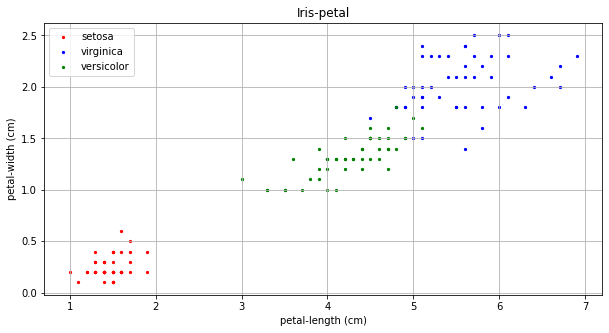

In [229]:
# petal
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

ax.scatter(
    df[df['class']=='Iris-setosa']['petallength'],
    df[df['class']=='Iris-setosa']['petalwidth'],
    facecolor='r',s=5,label='setosa')
ax.scatter(
    df[df['class']=='Iris-virginica']['petallength'],
    df[df['class']=='Iris-virginica']['petalwidth'],
    facecolor='b',s=5,label='virginica')
ax.scatter(
    df[df['class']=='Iris-versicolor']['petallength'],
    df[df['class']=='Iris-versicolor']['petalwidth'],
    facecolor='g',s=5,label='versicolor')
ax.set_xlabel('petal-length (cm)')
ax.set_ylabel('petal-width (cm)')
ax.set_title('Iris-petal')
ax.grid()
ax.legend()

In [230]:
X = df.drop('class',axis=1).to_numpy()[:,(0,1)]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.5,random_state=100)

reg = LogisticRegression()
reg.fit(X_train,y_train)
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)


print("Performance measures")
print("--------------------------------")
print(metrics.classification_report(y_train, train_pred, digits=3))
print("--------------------------------")
print(metrics.confusion_matrix(y_train, train_pred))

Performance measures
--------------------------------
                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        22
Iris-versicolor      0.692     0.818     0.750        33
 Iris-virginica      0.571     0.400     0.471        20

       accuracy                          0.760        75
      macro avg      0.755     0.739     0.740        75
   weighted avg      0.750     0.760     0.749        75

--------------------------------
[[22  0  0]
 [ 0 27  6]
 [ 0 12  8]]


---